# <span style="color:red"><center>Tarea 4</center></span>
### <span style="color:green"><justify>por: Elkin Uribe</justify></span>

<span style="color:green"><justify>3. Escriba una clase con las siguientes funcionalidades:
3.1. Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas
3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables.
3.3 Implemente un método que entregue los nombre de las variables disponibles.
3.3 Implemente un método que reciba el nombre de una variable disponible dentro del objeto ( en el  dataframe) y regrese: sus estadísticas básicas:  media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable </justify></span>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [2]:
class DataSet:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def basic_stats(self):
        return self.df.describe()

    def available_variables(self):
        return self.df.columns.tolist()

    def variable_stats(self, var_name):
        var_data = self.df[var_name]
        stats = {
            'mean': var_data.mean(),
            'median': var_data.median(),
            'std_dev': var_data.std(),
            'q25': var_data.quantile(0.25),
            'q50': var_data.quantile(0.5),
            'q75': var_data.quantile(0.75),
        }
        plt.hist(var_data, bins=20)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title('Distribution of ' + var_name)
        plt.show()
        return stats

In [3]:
# crear una instancia de DataSet
my_data = DataSet('iris.csv')

In [4]:
# obtener las estadísticas descriptivas básicas de todas las variables
basic_stats = my_data.basic_stats()
print(basic_stats)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [5]:
# obtener los nombres de las variables disponibles
available_vars = my_data.available_variables()
print(available_vars)

['0', '1', '2', '3', '4']


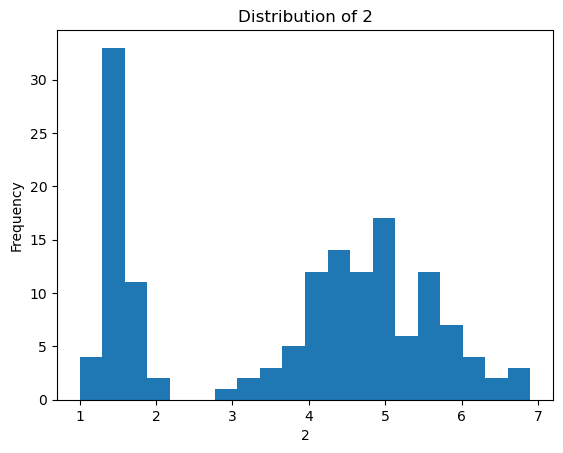

{'mean': 3.758666666666666, 'median': 4.35, 'std_dev': 1.7644204199522617, 'q25': 1.6, 'q50': 4.35, 'q75': 5.1}


In [6]:
# obtener las estadísticas y el histograma de una variable
sepal_length = '2'
var_stats = my_data.variable_stats(sepal_length)
print(var_stats)